<a href="https://colab.research.google.com/github/Sumit189/Image-Classifier/blob/master/Face_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [0]:
import tensorflow as tf
from keras.preprocessing import image

In [0]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_data=ImageDataGenerator(
            rotation_range=45,
            width_shift_range=0.2,
            height_shift_range=0.2,
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
    fill_mode='nearest',
)

test_data=ImageDataGenerator(rescale=1./255)

training_set=train_data.flow_from_directory(
         'drive/My Drive/Machine Learning/Training_set',
          target_size=(64,64),
          batch_size=32,
          class_mode='binary'
)

test_set=test_data.flow_from_directory(
         'drive/My Drive/Machine Learning/Test_set',
          target_size=(64,64),
          batch_size=32,
          class_mode='binary'
)



Found 22 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [0]:
history=model.fit_generator(training_set,
                         steps_per_epoch = 4,
                         epochs = 50,
                         validation_data = test_set,
                         validation_steps=4)

Epoch 1/50
4/4 [==============================] - 22s 5s/step - loss: 0.6220 - acc: 0.5568 - val_loss: 0.9511 - val_acc: 0.5000
Epoch 2/50
4/4 [==============================] - 19s 5s/step - loss: 0.6042 - acc: 0.6477 - val_loss: 1.1224 - val_acc: 0.4000
Epoch 3/50
4/4 [==============================] - 19s 5s/step - loss: 0.5274 - acc: 0.7727 - val_loss: 1.2033 - val_acc: 0.4500
Epoch 4/50
4/4 [==============================] - 19s 5s/step - loss: 0.4953 - acc: 0.8182 - val_loss: 1.3908 - val_acc: 0.5000
Epoch 5/50
4/4 [==============================] - 19s 5s/step - loss: 0.4707 - acc: 0.8295 - val_loss: 1.7789 - val_acc: 0.4000
Epoch 6/50
4/4 [==============================] - 19s 5s/step - loss: 0.4189 - acc: 0.8295 - val_loss: 2.0659 - val_acc: 0.4000
Epoch 7/50
4/4 [==============================] - 19s 5s/step - loss: 0.4702 - acc: 0.7727 - val_loss: 1.5564 - val_acc: 0.5000
Epoch 8/50
4/4 [==============================] - 19s 5s/step - loss: 0.3933 - acc: 0.8636 - val_loss: 1

Text(0.5, 1.0, 'Loss')

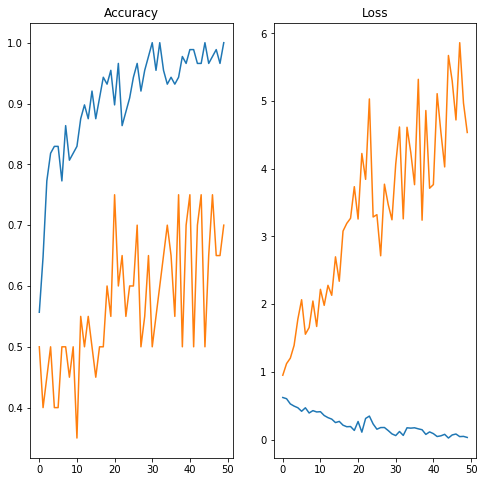

In [0]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epoch_range=range(50)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epoch_range,acc)
plt.plot(epoch_range,val_acc)
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epoch_range,loss)
plt.plot(epoch_range,val_loss)
plt.title('Loss')

#CAMERA IN COLAB


In [0]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import io
from PIL import Image

VIDEO_HTML = """
<video autoplay
 width=%d height=%d style='cursor: pointer;'></video>
<script>

var video = document.querySelector('video')

navigator.mediaDevices.getUserMedia({ video: true })
  .then(stream=> video.srcObject = stream)
  
var data = new Promise(resolve=>{
  video.onclick = ()=>{
    var canvas = document.createElement('canvas')
    var [w,h] = [video.offsetWidth, video.offsetHeight]
    canvas.width = w
    canvas.height = h
    canvas.getContext('2d')
          .drawImage(video, 0, 0, w, h)
    video.srcObject.getVideoTracks()[0].stop()
    video.replaceWith(canvas)
    resolve(canvas.toDataURL('image/jpeg', %f))
  }
})
</script>
"""
def take_photo(filename='photo.jpg', quality=0.8, size=(800,600)):
  display(HTML(VIDEO_HTML % (size[0],size[1],quality)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  f = io.BytesIO(binary)
  return np.asarray(Image.open(f))

img = take_photo()
im = Image.fromarray(img)
im.save("test.jpg")

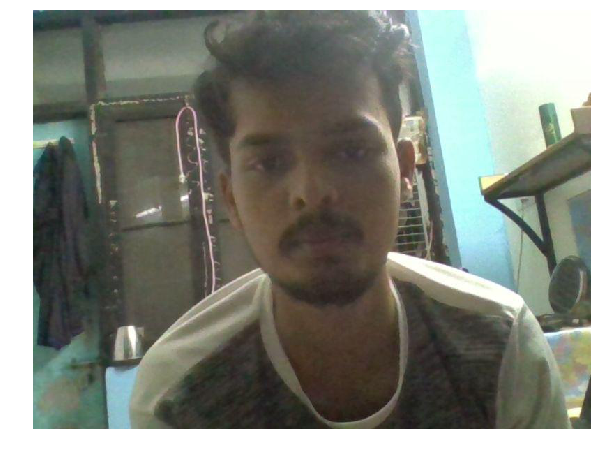

The Result is : Vivek
Is this Prediction right ? Y/N
y
Would you like to Save image for future reference ? Y/N
y
Save the data into TRAINING SET or VALIDATION SET ?
train


In [0]:
import numpy as np
import os
import random
from keras.preprocessing import image
import matplotlib.image as mpimg

file_name=['test.jpg']
plt.figure(figsize=(10,10))
for i in file_name:
  test_image=image.load_img(i,target_size=(64,64))
  test_image=image.img_to_array(test_image)
  test_image=np.expand_dims(test_image,axis=0)
  result=model.predict(test_image)
  training_set.class_indices
  img=mpimg.imread('/content/'+i)
  plt.imshow(img)
  plt.axis("off")
  plt.show()
  if result[0][0]>0.5:
    prediction='Vivek'
  else:
    prediction='Sumit'
  print("The Result is : "+prediction)
  
  check=input("Is this Prediction right ? Y/N\n")
  if(check=='y'):
    saving=input("Would you like to Save image for future reference ? Y/N\n")
    if(saving=='y'):
      train_test=input("Save the data into TRAINING SET or VALIDATION SET ?\n")
      if(train_test=='TRAIN' or train_test=='train' or train_test=='TRAINING SET' or train_test=='training set' or train_test=='Training set' or train_test=='Training Set'):
        im.save('drive/My Drive/Machine Learning/Training_set/'+prediction+'/'+str(random.randint(0,100))+'.jpg')
        print("Successfully saved image to the Training Set")
      elif(train_test=='VALIDATE' or train_test=='validate' or train_test=='Validation set' or train_test=='VALIDATION SET' or train_test=='validation set' or train_test=='Validation Set'):
        im.save('drive/My Drive/Machine Learning/Test_set/'+prediction+'/'+str(random.randint(0,100))+'.jpg')
        print("Successfully saved image to the Validation set")
      else:
        print("Invalid Input!!!")
    elif(saving=='n'):
      print("Thank you for trying")
    else:
      print("Invalid Input!!!")
  elif (check=='n'):
      print("Sorry for inconvinence")
  else:
    print("Invalid Input!!!")

